# 15. Results exploration

In [1]:
model2_file <- "../results/model2_2019-09-16.xlsx"

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 15.1 Define function 

In [3]:
readxl::read_excel(model2_file, .name_repair = make.names)

X,b,se,t,pvalue,ll,ul,df,crit,eform
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHANGE_SD,1.934156e+00,1.153266e+00,1.6771109,0.09804583,-3.665479e-01,4.234859e+00,69,1.994945,0
CHANGE_SD_SQ,-5.416401e-01,3.137284e-01,-1.7264619,0.08873945,-1.167511e+00,8.423089e-02,69,1.994945,0
M_A,3.753253e+00,1.641254e+00,2.2868205,0.02527892,4.790411e-01,7.027465e+00,69,1.994945,0
M_A_2,-1.208532e+00,8.338355e-01,-1.4493645,0.15176578,-2.871988e+00,4.549247e-01,69,1.994945,0
CRUDE_MILES_3,3.897520e-03,2.654086e-03,1.4684978,0.14651337,-1.397237e-03,9.192277e-03,69,1.994945,0
CRUDE_AVG_AGE_3,9.776852e-03,1.961940e-02,0.4983258,0.61983917,-2.936277e-02,4.891648e-02,69,1.994945,0
CRUDExAGE,-1.112237e-04,5.421485e-05,-2.0515364,0.04401254,-2.193794e-04,-3.068072e-06,69,1.994945,0
HVL_MILES_3,3.889376e-03,5.476403e-03,0.7102064,0.47996966,-7.035749e-03,1.481450e-02,69,1.994945,0
HVL_AVG_AGE_3,4.476011e-02,2.512521e-02,1.7814823,0.07923435,-5.363306e-03,9.488353e-02,69,1.994945,0


In [4]:
plot_effects <- function(results_file, intercept="_cons", linear_effect, plot_range, squared_effect=NA){
    results <- readxl::read_excel(results_file, .name_repair = make.names)

    intercept <- results[results$X == intercept, ]
    lin_effect <- results[results$X == linear_effect, ]
    if (!is.na(squared_effect)){
        sq_effect <- results[results$X == squared_effect, ]
    } else {# create tuple with all zeros for subsequent rows to read from
        sq_effect <- tibble(b=0, ll=0, ul=0)}
    
    eq <- function(x){lin_effect$b*x + sq_effect$b*x^2 }
    eq_lower <- function(x){lin_effect$ll*x + sq_effect$ll*x^2 + intercept$ll - intercept$b}
    eq_upper <- function(x){lin_effect$ul*x + sq_effect$ul*x^2 + intercept$ul - intercept$b}

    eq_data <- data.frame(x=seq(plot_range[1], plot_range[2], 0.01))
    eq_data$lower <- sapply(eq_data$x, FUN = eq_lower)
    eq_data$predicted <- sapply(eq_data$x, FUN = eq)
    eq_data$upper <- sapply(eq_data$x, FUN = eq_upper)
    
    plot <- ggplot(eq_data, aes(x=x, y=predicted)) +
        geom_line() +
        geom_hline(yintercept=0, size = 0.3) +
        geom_line(aes(x=x, y=upper), color="red") +
        geom_ribbon(aes(ymin=predicted, ymax=upper), fill="red", alpha=0.3) + 
        geom_line(aes(x=x, y=lower), color="blue") +
        geom_ribbon(aes(ymin=predicted, ymax=lower), fill="blue", alpha=0.3)
    
    return(plot)
}

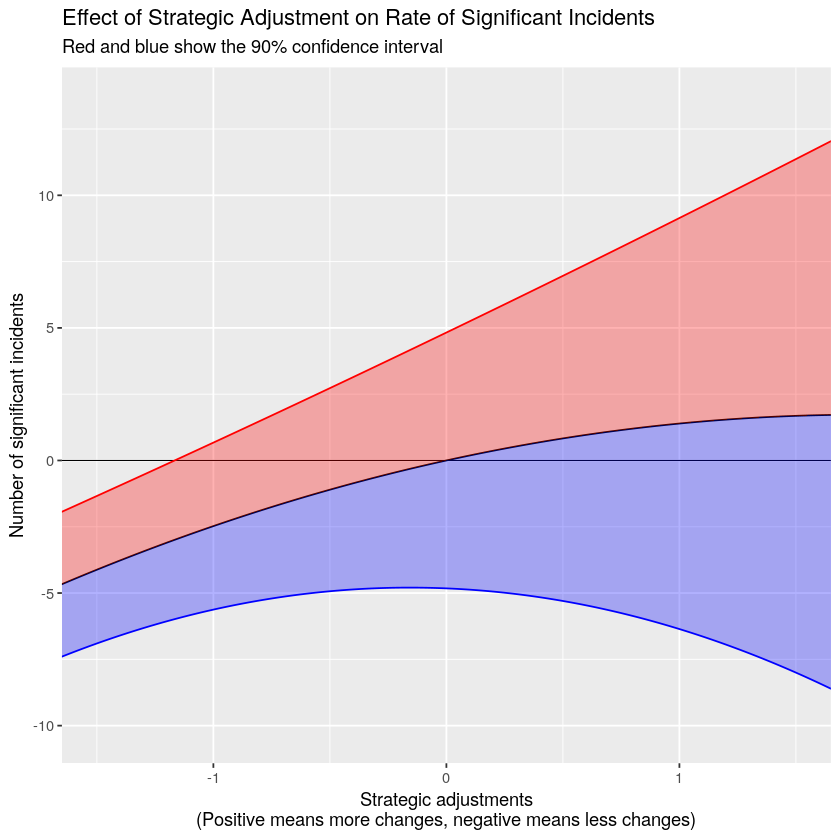

In [5]:
results_plot <- plot_effects(model2_file, linear_effect="CHANGE_SD", squared_effect= "CHANGE_SD_SQ", plot_range = c(-2, 2)) +
    coord_cartesian(xlim=c(-1.5, 1.5)) +
    labs(title="Effect of Strategic Adjustment on Rate of Significant Incidents", 
         x="Strategic adjustments\n(Positive means more changes, negative means less changes)", 
         y="Number of significant incidents", 
         subtitle="Red and blue show the 90% confidence interval")

results_plot

In [6]:
ggsave("../drafts/summer_paper/illustrations/effect_size.png", results_plot)

Saving 6.67 x 6.67 in image


## 15.2 All observations

In [7]:
fe_all <- readxl::read_excel(fe_all_file, .name_repair = make.names)

ERROR: Error in is_string(path): object 'fe_all_file' not found


In [ ]:
fe_all

In [ ]:
intercept_row <- match("_cons", fe_all$X)

intercept_all <- pull(fe_all[intercept_row, "b"])
intercept_all_lower <- pull(fe_all[intercept_row, "ll"])
intercept_all_upper <- pull(fe_all[intercept_row, "ul"])

print(c(intercept_all, intercept_all_lower, intercept_all_upper))

In [ ]:
lin_row <- match("sd_change_3", fe_all$X)

lin_all <- pull(fe_all[lin_row, "b"])
lin_all_lower <- pull(fe_all[lin_row, "ll"])
lin_all_upper <- pull(fe_all[lin_row, "ul"])

print(c(lin_all, lin_all_lower, lin_all_upper))

In [ ]:
sq_row <- match("sd_change_sq", fe_all$X)

sq_all <- pull(fe_all[sq_row, "b"])
sq_all_lower <- pull(fe_all[sq_row, "ll"])
sq_all_upper <- pull(fe_all[sq_row, "ul"])

print(c(sq_all, sq_all_lower, intercept_all_upper))

In [ ]:
eq_all <- function(x){lin_all*x + sq_all*x^2 + intercept_all}
eq_all_lower <- function(x){lin_all_lower*x + sq_all_lower*x^2 + intercept_all_lower}
eq_all_upper <- function(x){lin_all_upper*x + sq_all_upper*x^2 + intercept_all_upper}

eq_all_data <- data.frame(x=c(-2200:2200))
eq_all_data$lower <- sapply(eq_all_data$x, FUN = eq_all_lower)
eq_all_data$predicted <- sapply(eq_all_data$x, FUN = eq_all)
eq_all_data$upper <- sapply(eq_all_data$x, FUN = eq_all_upper)

In [ ]:
head(eq_all_data)

## All linear

In [ ]:
-1.55e-06

## Small linear

In [ ]:
lin_small <- 6.48e-06

In [ ]:
sq_small <- 0

In [ ]:
eq_small <- function(x){lin_small*x + sq_small*x^2}

In [ ]:
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) +
    stat_function(fun=eq_small) +
    xlim(-250, 250) + 
    labs(title="Curve as estimated in FE model")
    